In [8]:
import pandas as pd
import sys
import os
import re
import matplotlib.pyplot as plt



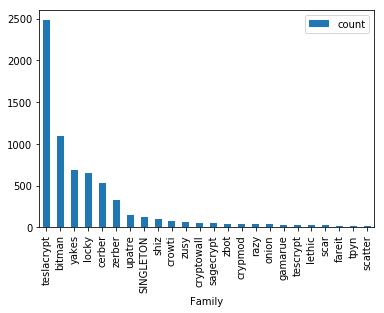

In [9]:
#path = "./dll_analysis/malware"
#filename = "fixed_rules.csv"
path = "./exe_analysis/malware/"
filename = "rules_fixed.csv"
file_to_scan = os.path.join(path,filename)
pd_dataset=pd.read_csv(file_to_scan)
pd_dataset["first_seen:month"]=pd.to_datetime(pd_dataset["first_seen"]).dt.to_period("M")
pd_dataset["Family"]=pd_dataset["Family"].apply(lambda x: "SINGLETON" if(re.match(".*SINGLETON.*",x)) else x)
df = pd_dataset.loc[:,"Family"].groupby(pd_dataset["Family"]).count().reset_index(name="count")
df = df.set_index("Family")
plt.tight_layout()
""" For DLLs, since there are few families. To be tuned if necessary. """
#ax = df.sort_values(by="count", ascending= False).plot(kind="bar")
ax = df[df["count"]>10].sort_values(by="count", ascending= False).plot(kind="bar")
ax.get_figure().savefig(path+"most_frequent_families", dpi = 700, bbox_inches="tight")
#pivot_df = pd_dataset.pivot(index="first_seen",)

In [14]:
df.head()

,Family,count
0,SINGLETON,130
1,agentb,3
2,allaple,4
3,amonetize,1
4,atraps,2
5,attribute,1
6,aura,2
7,autoit,2
8,barys,4
9,beebone,3


SINGLETON
locky
upatre
zerber
shiz
bitman
teslacrypt
yakes
cerber


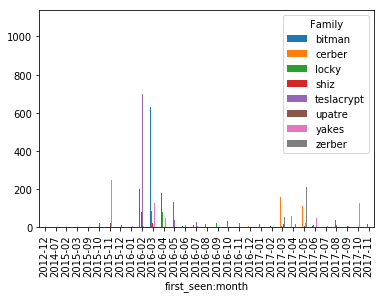

In [18]:

df_first_month = pd.DataFrame(pd_dataset.loc[:].groupby(["first_seen:month","Family"]).size().reset_index(name="count"))
families_to_keep = set()
for index, entry in df.iterrows():
    """ Keeping all the families for DLLs, since they are few. """
    #families_to_keep.add(entry.name)
    """ For EXEs (eventually to be tuned):"""
    if( entry["count"] > 100 ):
        families_to_keep.add(entry.name)
out_csv = open(path+"most_frequent_families.csv","w")
for family in families_to_keep:
    print(family)
    out_csv.write(family+"\n")
#df_filtered = pd.DataFrame()
#for index, entry in df_first_month.iterrows():
#    for family in families_to_keep:
#        if(entry.Family in family):
#            df_filtered = df_filtered.append(entry)

df_first_month = df_first_month[df_first_month["Family"].isin(families_to_keep)]
df_first_month = df_first_month[df_first_month["Family"] != "SINGLETON"]
#df_first_day.pivot(index="first_seen:day", columns="Family", values="count").plot(kind="bar")
#df_last_day.pivot(index="last_seen:day", columns="Family", values="count").plot(kind="bar")
ax = df_first_month.pivot(index="first_seen:month", columns="Family", values="count").plot(kind="bar")
ax.get_figure().savefig(path+"families_per_month_hist", dpi = 900, bbox_inches="tight")
plt.show()

In [6]:
df_first_month["Family"].to_csv(path+"/most_frequent_families.csv")
